In [1]:
from Bio import SeqIO
from Bio.Align import PairwiseAligner
import pandas as pd

# Load HIV Sequence
(Count Nucleotide Bases, Calculate GC content)

In [9]:
my_seq = SeqIO.read("sequence.fasta", "fasta")
print("My sequence ID:", my_seq.id)
print("Length:", len(my_seq.seq))
# Nucleotide count
print("My Sequence_Nucleotide Bases:")
a_count = my_seq.seq.count("A")
print(f"Adenine (A): {a_count}")
t_count = my_seq.seq.count("T")
print(f"Thymine (T): {t_count}")
c_count = my_seq.seq.count("C")
print(f"Cytosine (C): {c_count}")
g_count = my_seq.seq.count("G")
print(f"Guanine (G): {g_count}")
# GC Content
gc = (g_count + c_count) / len(my_seq.seq) * 100
print(f"GC Content_My Seq: {gc: .2f}%")

My sequence ID: AF033819.3
Length: 9181
My Sequence_Nucleotide Bases:
Adenine (A): 3272
Thymine (T): 2042
Cytosine (C): 1642
Guanine (G): 2225
GC Content_My Seq:  42.12%


# Load Reference Sequence
(Count Nucleotide Bases, Calculate GC content)

In [3]:
ref_seq = SeqIO.read("sequence2.fasta", "fasta")
print("Reference sequence ID:", ref_seq.id)
print("Length:", len(ref_seq.seq))
# Nucleotide count
print("Ref Sequence_Nucleotide Bases:")
a_count = ref_seq.seq.count("A")
print(f"Adenine (A): {a_count}")
t_count = ref_seq.seq.count("T")
print(f"Thymine (T): {t_count}")
c_count = ref_seq.seq.count("C")
print(f"Cytosine (C): {c_count}")
g_count = ref_seq.seq.count("G")
print(f"Guanine (G): {g_count}")
# GC Content
gc = (g_count + c_count) / len(ref_seq.seq) * 100
print(f"GC Content_Ref Seq: {gc: .2f}%")


Reference sequence ID: K03455.1
Length: 9719
Ref Sequence_Nucleotide Bases:
Adenine (A): 3411
Thymine (T): 2163
Cytosine (C): 1772
Guanine (G): 2373
GC Content_Ref Seq:  42.65%


# Pairwise Alignment

In [4]:
aligner = PairwiseAligner()
aligner.mode = "global" # end-to-end alignment
aligner.match_score = 1
aligner.mismatch_score = 0
aligner.open_gap_score = -1
aligner.extend_gap_score = -0.5
alignment = aligner.align(my_seq.seq, ref_seq.seq)
best_alignment = alignment[0]
print("Best alignment:", best_alignment)

Best alignment: target            0 ------------------------------------------------------------
                  0 ------------------------------------------------------------
query             0 TGGAAGGGCTAATTCACTCCCAACGAAGACAAGATATCCTTGATCTGTGGATCTACCACA

target            0 ------------------------------------------------------------
                 60 ------------------------------------------------------------
query            60 CACAAGGCTACTTCCCTGATTAGCAGAACTACACACCAGGGCCAGGGATCAGATATCCAC

target            0 ------------------------------------------------------------
                120 ------------------------------------------------------------
query           120 TGACCTTTGGATGGTGCTACAAGCTAGTACCAGTTGAGCCAGAGAAGTTAGAAGAAGCCA

target            0 ------------------------------------------------------------
                180 ------------------------------------------------------------
query           180 ACAAAGGAGAGAACACCAGCTTGTTACACCCTGTGAGCCTGCATGGAATGGATGACCCGG

target  

# Identify Mutations
(Positions where bases differ)

In [5]:
mutations = []
for i, (ref_base, my_base) in enumerate(zip(ref_seq.seq, my_seq.seq), start=1):
    if ref_base != my_base:
        mutations.append((i, ref_base, my_base))

First few mutations:
   Position Reference My_Sequence
0         1         T           G
1         3         G           T
2         4         A           C
3         5         A           T
4         6         G           C
Total number of mutations: 6703
My_Sequence
A    2085
G    1684
T    1572
C    1362
Name: count, dtype: int64


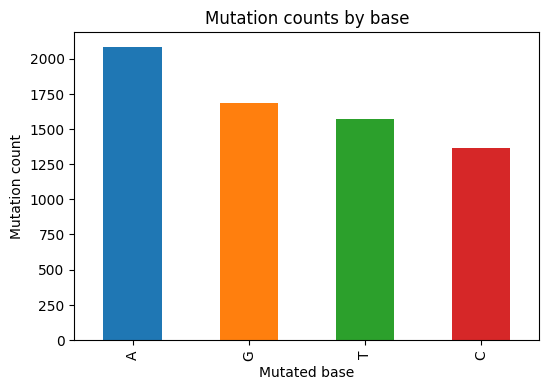

In [6]:
mut_df = pd.DataFrame(mutations, columns=["Position", "Reference", "My_Sequence"])
print("First few mutations:")
print(mut_df.head())
print("Total number of mutations:", len(mut_df))
# count how many times each mutated base appears
mutation_counts = mut_df['My_Sequence'].value_counts()
print(mutation_counts)
# simple bar plot
import matplotlib.pyplot as plt
plt.figure(figsize = (6,4))
mutation_counts.plot(kind='bar',
color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],)
plt.title("Mutation counts by base")
plt.xlabel("Mutated base")
plt.ylabel("Mutation count")
plt.show()

# HIV-1 gene coordinates
(based on reference genome)

Gene Mutation Counts Gene
pol           2032
env           1880
intergenic    1716
gag           1075
Name: count, dtype: int64


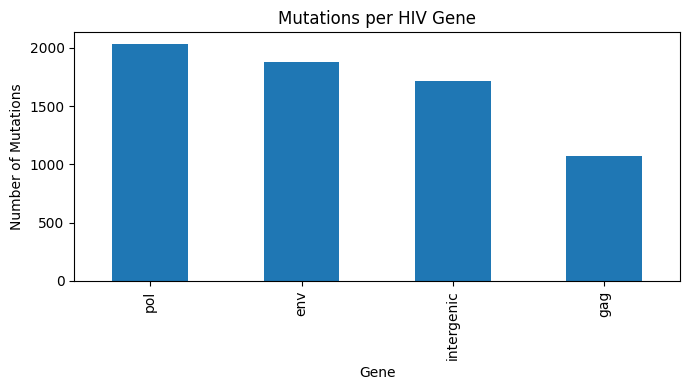

In [7]:
genes = {
    "gag": (790, 2292),
    "pol": (2085, 5096),
    "env": (6225, 8795)
}
# Assign mutations to genes
def assign_gene(position):
    for gene, (start, end) in genes.items():
        if start <= position <= end:
            return gene
    return "intergenic"

mut_df["Gene"] = mut_df["Position"].apply(assign_gene)
mut_df.head()
gene_mutation_counts = mut_df["Gene"].value_counts()
print("Gene Mutation Counts", gene_mutation_counts)
# Visual Chart
plt.figure(figsize=(7,4))
gene_mutation_counts.plot(kind="bar")
plt.title("Mutations per HIV Gene")
plt.xlabel("Gene")
plt.ylabel("Number of Mutations")
plt.tight_layout()
plt.show()